In [5]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [6]:
data = scipy.io.loadmat('ex7data2.mat')
# print(data)

(300, 2)


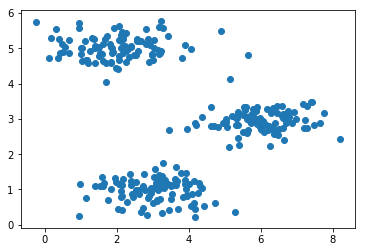

In [16]:
X = data['X']
print(X.shape)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [29]:
def find_centroids(X, centroids):
    dis = cdist(X, centroids)
    labels = np.argmin(dis, axis=1)
#     print(labels.shape)
    return labels

def update_centroids(X, labels, K):
    centroids = np.zeros((K, X.shape[1]))
    for k in range(K):
        ids = np.where(labels == k)[0]
        centroids[k] = np.mean(X[ids], axis=0)
#     print(centroids.shape)
    return centroids

In [41]:
K = 3
centroids = np.random.rand(3, X.shape[1])
print(centroids)
centroids_set = [centroids]
for i in range(10):
    labels = find_centroids(X, centroids)
    centroids = update_centroids(X, labels, K)
    centroids_set.append(centroids)
print(centroids_set)

[[0.8912606  0.65136052]
 [0.80284277 0.50482386]
 [0.43307811 0.88007115]]
[array([[0.8912606 , 0.65136052],
       [0.80284277, 0.50482386],
       [0.43307811, 0.88007115]]), array([[4.43560861, 2.25751876],
       [0.94623208, 0.24522253],
       [1.66210196, 5.01860508]]), array([[5.10427132, 2.24339357],
       [2.17863681, 0.92328251],
       [1.98363152, 5.03043004]]), array([[5.72466356, 2.67273481],
       [2.7768072 , 0.97636856],
       [1.98363152, 5.03043004]]), array([[6.01715556, 2.94687908],
       [3.01200442, 1.00482878],
       [1.98363152, 5.03043004]]), array([[6.03366736, 3.00052511],
       [3.04367119, 1.01541041],
       [1.95399466, 5.02557006]]), array([[6.03366736, 3.00052511],
       [3.04367119, 1.01541041],
       [1.95399466, 5.02557006]]), array([[6.03366736, 3.00052511],
       [3.04367119, 1.01541041],
       [1.95399466, 5.02557006]]), array([[6.03366736, 3.00052511],
       [3.04367119, 1.01541041],
       [1.95399466, 5.02557006]]), array([[6.0336

(3, 2)
[[0.8912606  0.65136052]
 [0.80284277 0.50482386]
 [0.43307811 0.88007115]]


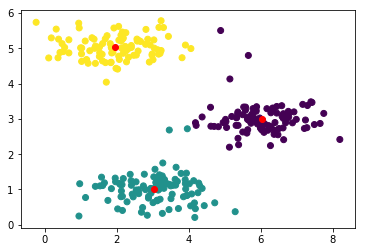

In [54]:
plt.scatter(X[:, 0], X[:, 1], c=labels)
print(centroids_set[0].shape)
print(centroids_set[0])
plt.scatter(centroids[:, 0], centroids[:, 1], c='r')
# plt.plot(centroids_set[:,:, 0], centroids_set[:, :, 1])
# plt.plot(centroids)
plt.show()

(128, 128, 3)


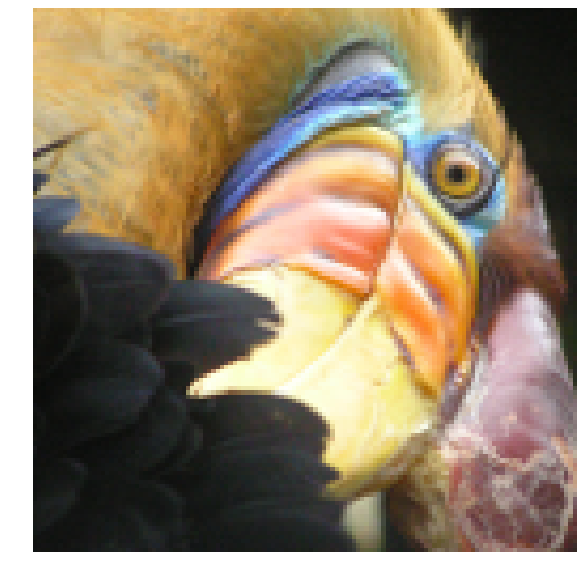

In [57]:
image = plt.imread('bird_small.png')
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
print(image.shape)

In [56]:
from sklearn.cluster import KMeans
X = image.reshape(-1, image.shape[2])

In [59]:
K = 16
kmeans = KMeans(n_clusters=K)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [62]:
labels = kmeans.predict(X)
print(labels.shape)
print(labels[:50])

(16384,)
[15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15  0
  4  4]


(16384, 3)


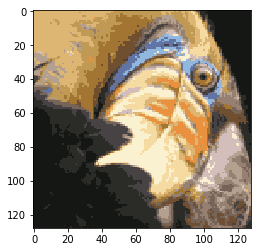

In [74]:
new_image = np.zeros(X.shape)
for k in range(K):
    new_image[labels==k] = kmeans.cluster_centers_[k]
print(new_image.shape)
new_image = new_image.reshape(128, 128, 3)
plt.imshow(new_image)
plt.show()

(128, 128, 3)


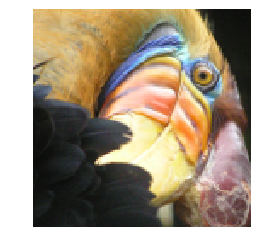

In [75]:
image = plt.imread('bird_small.png')
# plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
print(image.shape)